In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [44]:
import imutils

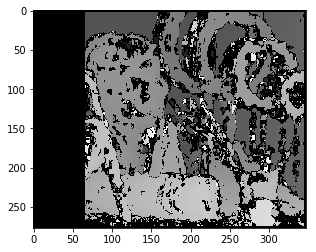

In [218]:
left=cv2.imread('im0.png',0)
right=cv2.imread('im1.png',0)
gnd_truth=cv2.imread("mask0nocc.png",0)
#stereo = cv2.StereoBM(cv2.STEREO_BM_BASIC_PRESET,ndisparities=16, SADWindowSize=15)
stereo=cv2.StereoBM_create(numDisparities=64, blockSize=7)
disparity = stereo.compute(left,right)
plt.imshow(disparity,'gray')
plt.savefig('foo.png')
disp=cv2.imread('foo.png',0)
plt.show()

In [84]:
img1.shape

(277, 347)

In [219]:
img1 = imutils.resize(left)
img2=imutils.resize(right)
img3 = imutils.resize(gnd_truth)
img4 = imutils.resize(disp)

In [207]:
#sum of absolute difference
d=0
p=0
c=sys.maxsize
for i in range(img1.shape[0]):
    s+=((img2[1]-img1[1])+(img2[0]-d-img1[0]))**2
    p=sum(s)
    if p<c:
        c=p
        d=i
print(d,c)        

237 37039


In [195]:
#sum of absolute diffrence
d=0
p=0
c=sys.maxsize
for i in range(img1.shape[0]):
    s+=(abs(img2[1]-img1[1])+abs(img2[0]-d-img1[0]))**2
    p=sum(s)
    if p<c:
        c=p
        d=i
print(d,c)


251 34635


In [193]:
#sum of absolute diffrence
d=0
p=0
c=sys.maxsize
for i in range(img1.shape[0]):
    s+=(abs(img2[1]-img1[1])+abs(img2[0]-d-img1[0]))
    p=sum(s)
    if p<c:
        c=p
        d=i
print(d,c)


164 32216


In [140]:
#
def getAverage(img, u, v, n):
    """img as a square matrix of numbers"""
    s = 0
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            s += img[u+i][v+j]
    return float(s)/(2*n+1)**2

def getStandardDeviation(img, u, v, n):
    s = 0
    avg = getAverage(img, u, v, n)
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            s += (img[u+i][v+j] - avg)**2
    return (s**0.5)/(2*n+1)

def zncc(img1, img2, u1, v1, u2, v2, n):
    stdDeviation1 = getStandardDeviation(img1, u1, v1, n)
    stdDeviation2 = getStandardDeviation(img2, u2, v2, n)
    avg1 = getAverage(img1, u1, v1, n)
    avg2 = getAverage(img2, u2, v2, n)

    s = 0
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            s += (img1[u1+i][v1+j] - avg1)*(img2[u2+i][v2+j] - avg2)
    return float(s)/((2*n+1)**2 * stdDeviation1 * stdDeviation2)

In [113]:
zncc(img1,img2,1,1,1,1,1)

0.8723833291138526

In [214]:
#route mean square
#w=5
p=0
for i in range(img1.shape[0]):
    s=((img2[1]-img1[1])**2+(img2[0]-img1[0])**2)**(1/2)
    p+=sum(s)

In [215]:
p

999322.3321172836

In [220]:
#route mean square
#w=7
p=0
for i in range(img1.shape[0]):
    s=((img2[1]-img1[1])**2+(img2[0]-img1[0])**2)**(1/2)
    p+=sum(s)

In [221]:
#route mean square
#w=7
p=0
for i in range(img1.shape[0]):
    s=((img3[1]-img4[1])**2+(img3[0]-img4[0])**2)**(1/2)
    p+=sum(s)

999322.3321172836